<a href="https://colab.research.google.com/github/prachi732/MachineLearning/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_cleaned.csv to data_cleaned.csv


In [8]:
data=pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [11]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [22]:
data.shape

(891, 25)

In [0]:
x=data.drop(["Survived"],axis=1)
y=data["Survived"]


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,stratify=y,test_size=0.25)

In [24]:
data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [25]:
x_train.shape,y_train.shape

((668, 24), (668,))

In [0]:
from sklearn.tree import DecisionTreeClassifier as dt

In [0]:
model=dt(random_state=10)

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [0]:
y_pred=model.predict(x_test)
y_predt=model.predict(x_train)

In [50]:
from sklearn.metrics import accuracy_score

print("The accuracy score for testing data is:",accuracy_score(y_test,y_pred))


The accuracy score for testing data is: 0.7533632286995515


In [38]:


print("The accuracy score for training data:",accuracy_score(y_train,y_predt))

The accuracy score for training data: 0.9880239520958084


In [0]:
#Changing max_depth
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
  model=dt(max_depth=depth,random_state=10)
  model.fit(x_train,y_train)
  train_accuracy.append(model.score(x_train,y_train))
  validation_accuracy.append(model.score(x_test,y_test))

In [52]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300


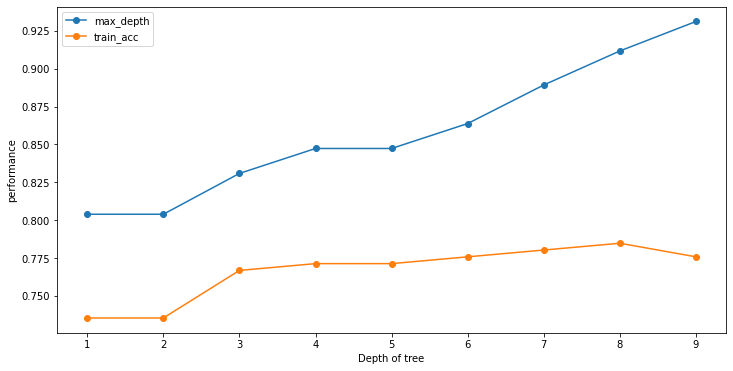

In [106]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o')
plt.plot(frame['max_depth'],frame['valid_acc'],marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(frame)

In [0]:
model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [69]:
model.fit(x_train, y_train)




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [71]:
model.score(x_train, y_train)


0.8802395209580839

In [72]:
model.score(x_test, y_test)

0.8116591928251121